#**Problem Statement-1:**

##Linear Regression:

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs.

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

##DATA DICTIONARY:
-----------------------
System measures used:

lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation .

runqsz - Process run queue size (The number of kernel threads in memory that
are waiting for a CPU to run.

Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

usr - Portion of time (%) that cpus run in user mode

**1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.**

In [ ]:
#Importint Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Loading the data
df=pd.read_excel('compactiv.xlsx')

In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [ ]:
df.shape

(8192, 22)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


Univariat Analysis

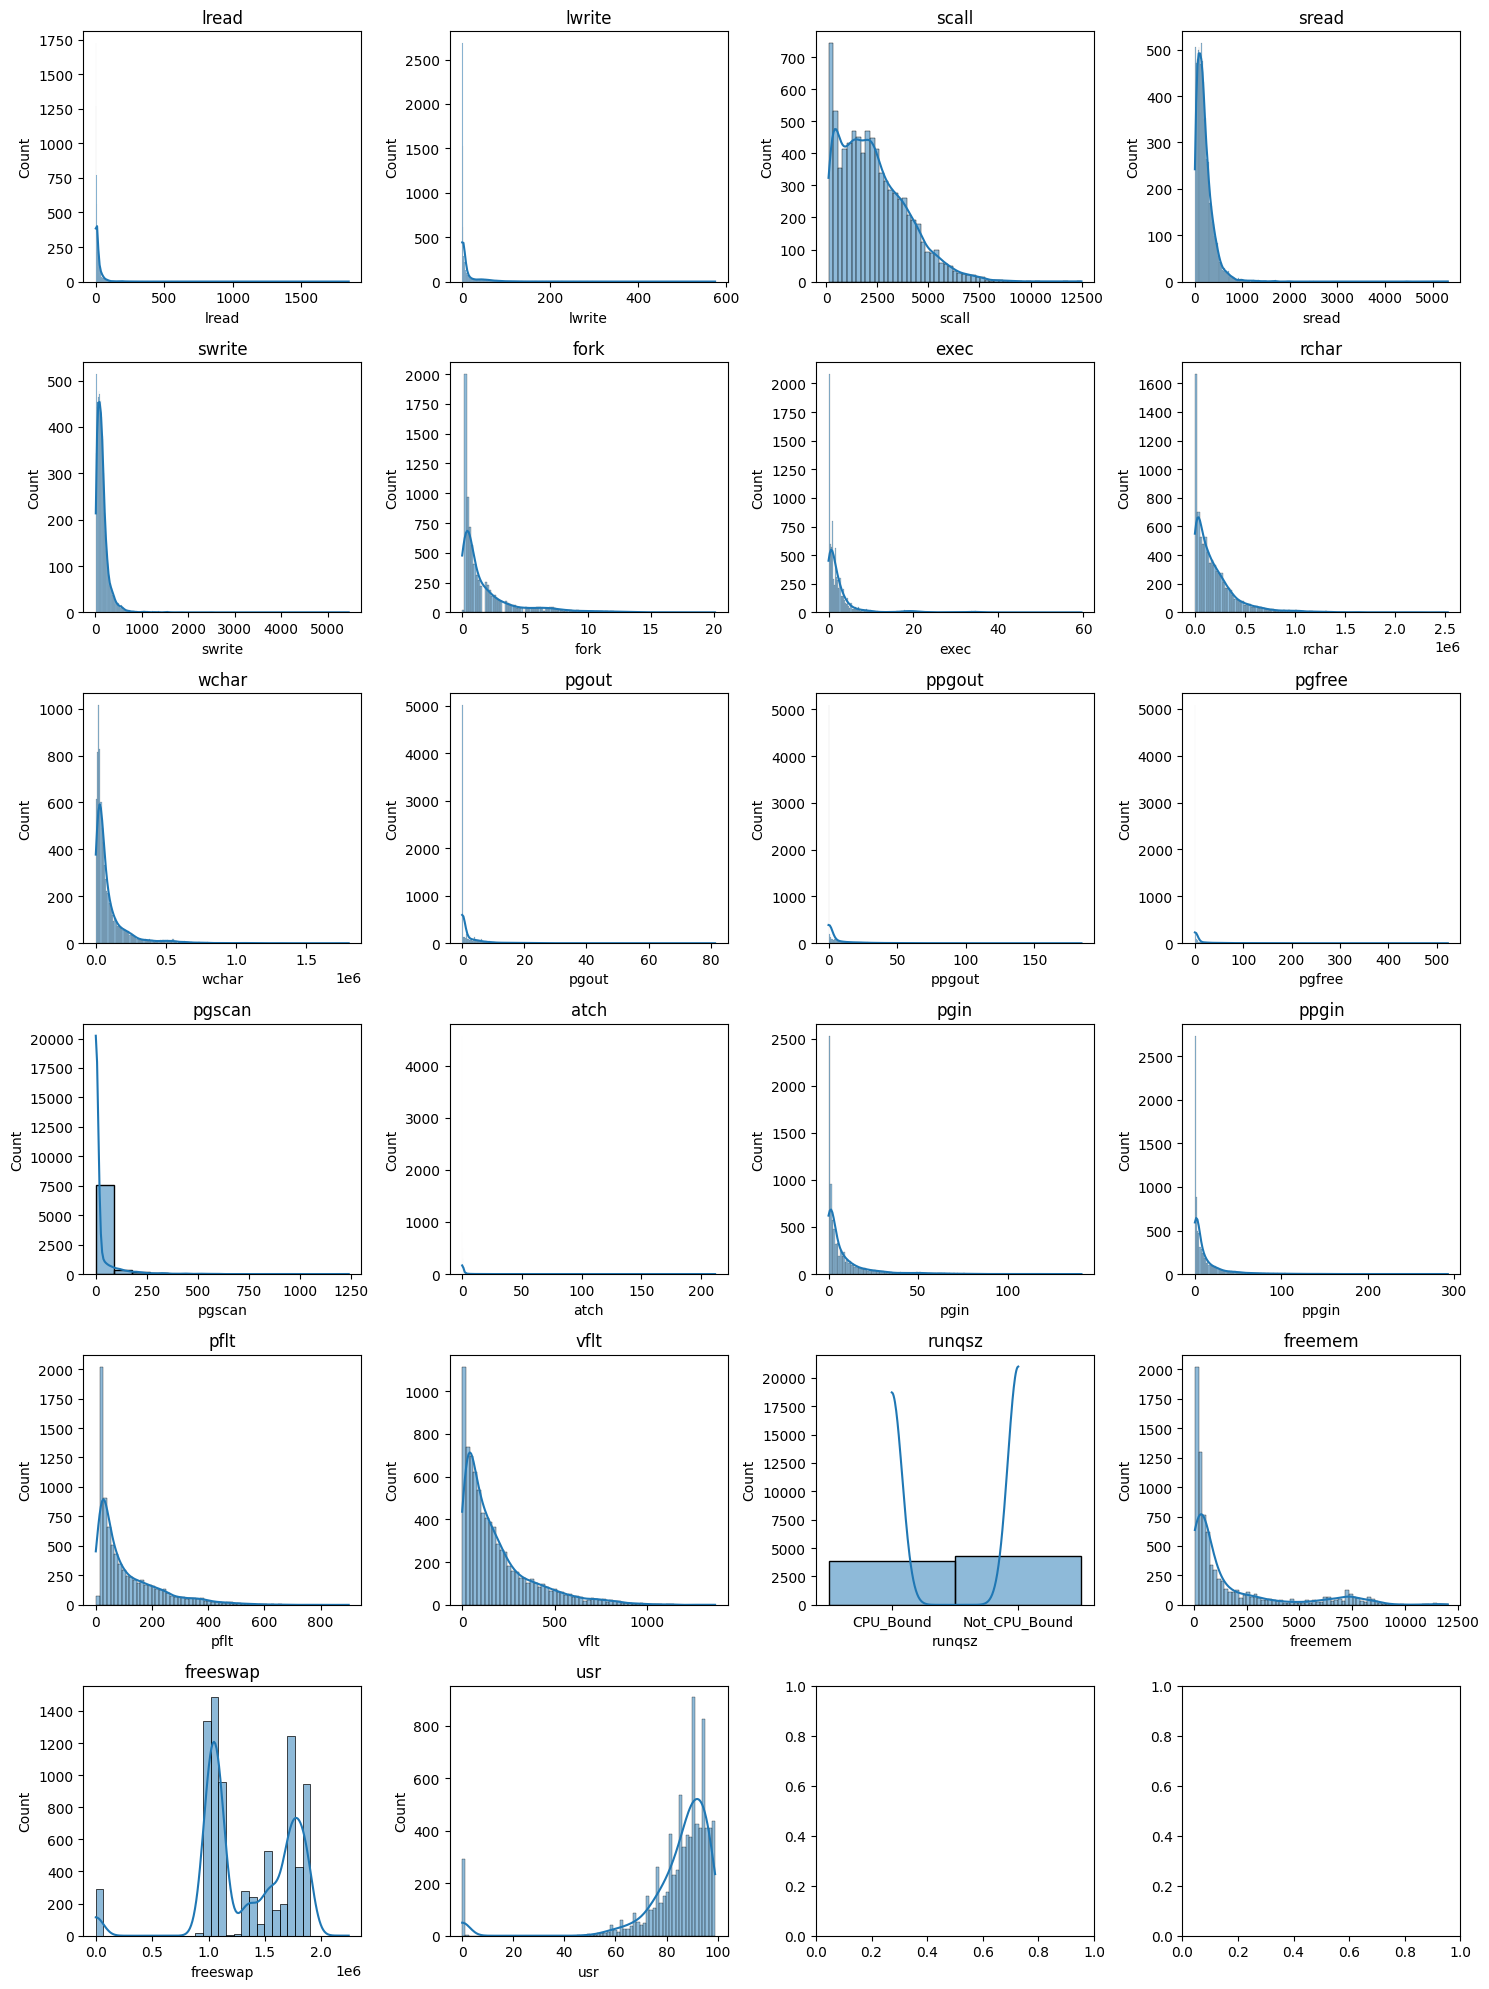

In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axs[i],kde=True)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Bivariate & Multivariate Analysis

In [ ]:
  #sns.pairplot(df, diag_kind='kde',corner=True);

<ipython-input-9-89475fbedba3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-9-89475fbedba3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


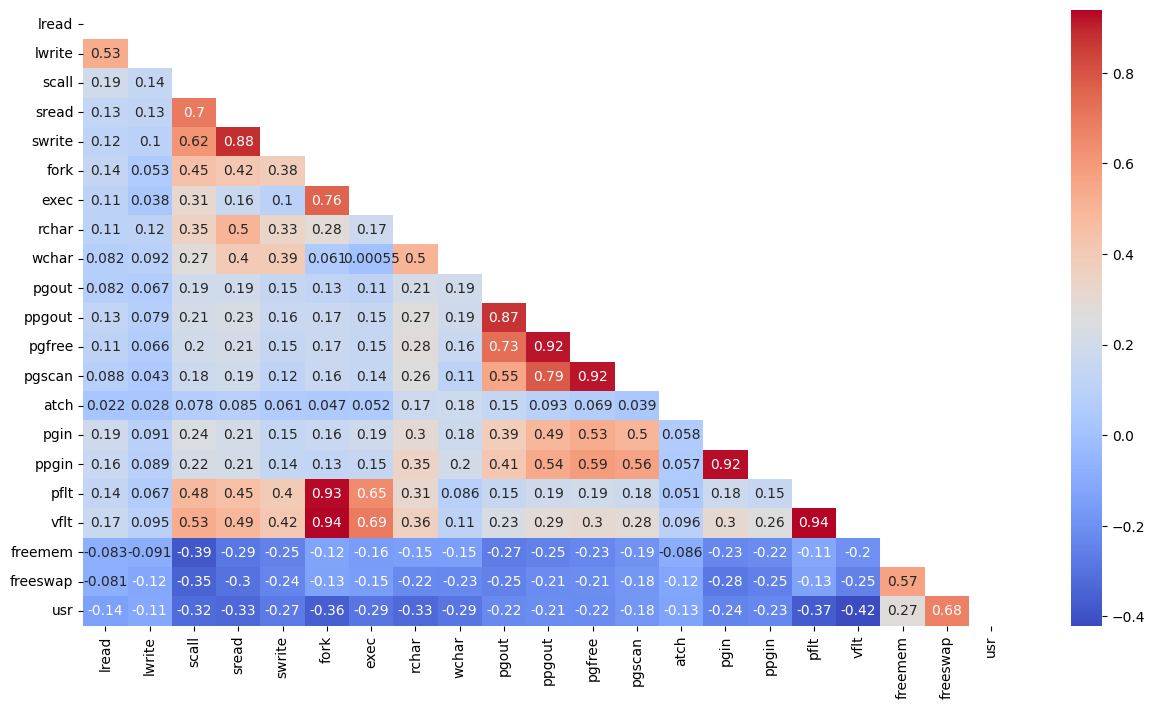

In [ ]:
fig = plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df.corr()))
%matplotlib inline

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm",mask=mask, annot_kws={'size': 10})
plt.show()

**1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.**

In [ ]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


### Imputing missing values

In [ ]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [ ]:
cols=df.isnull().sum()[df.isnull().sum()>0].index
cols

Index(['rchar', 'wchar'], dtype='object')

In [ ]:
objects=df[cols].select_dtypes(include=['object','category']).columns
non_objects=df[cols].select_dtypes(exclude=['object','category']).columns

In [ ]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)#nil, null, NaN
imputer= imputer.fit(df[non_objects])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [ ]:
df[non_objects]=imputer.transform(df[non_objects])

In [ ]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [ ]:
# Check for the values which are equal to zero for each column
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    percent_zero = (column == 0).sum() / len(column) * 100
    print('zeros in', column_name, ':       ', count)



zeros in lread :        675
zeros in lwrite :        2684
zeros in scall :        0
zeros in sread :        0
zeros in swrite :        0
zeros in fork :        21
zeros in exec :        21
zeros in rchar :        0
zeros in wchar :        0
zeros in pgout :        4878
zeros in ppgout :        4878
zeros in pgfree :        4869
zeros in pgscan :        6448
zeros in atch :        4575
zeros in pgin :        1220
zeros in ppgin :        1220
zeros in pflt :        3
zeros in vflt :        0
zeros in runqsz :        0
zeros in freemem :        0
zeros in freeswap :        0
zeros in usr :        283


In [ ]:
#Checking Duplicates
df.duplicated().sum()

0

Encoding the data

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ', df[column].nunique())
        print(df[column].value_counts(normalize = True).sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        0.471313
Not_CPU_Bound    0.528687
Name: runqsz, dtype: float64




In [ ]:
df['runqsz'].replace(['CPU_Bound','Not_CPU_Bound'],[True,False], inplace =True)

In [ ]:
df['runqsz'].astype("object")

0        True
1       False
2       False
3       False
4       False
        ...  
8187     True
8188    False
8189    False
8190     True
8191     True
Name: runqsz, Length: 8192, dtype: object

In [ ]:
df = pd.get_dummies(df, columns = ['runqsz'], drop_first=True)

Checking Outliers

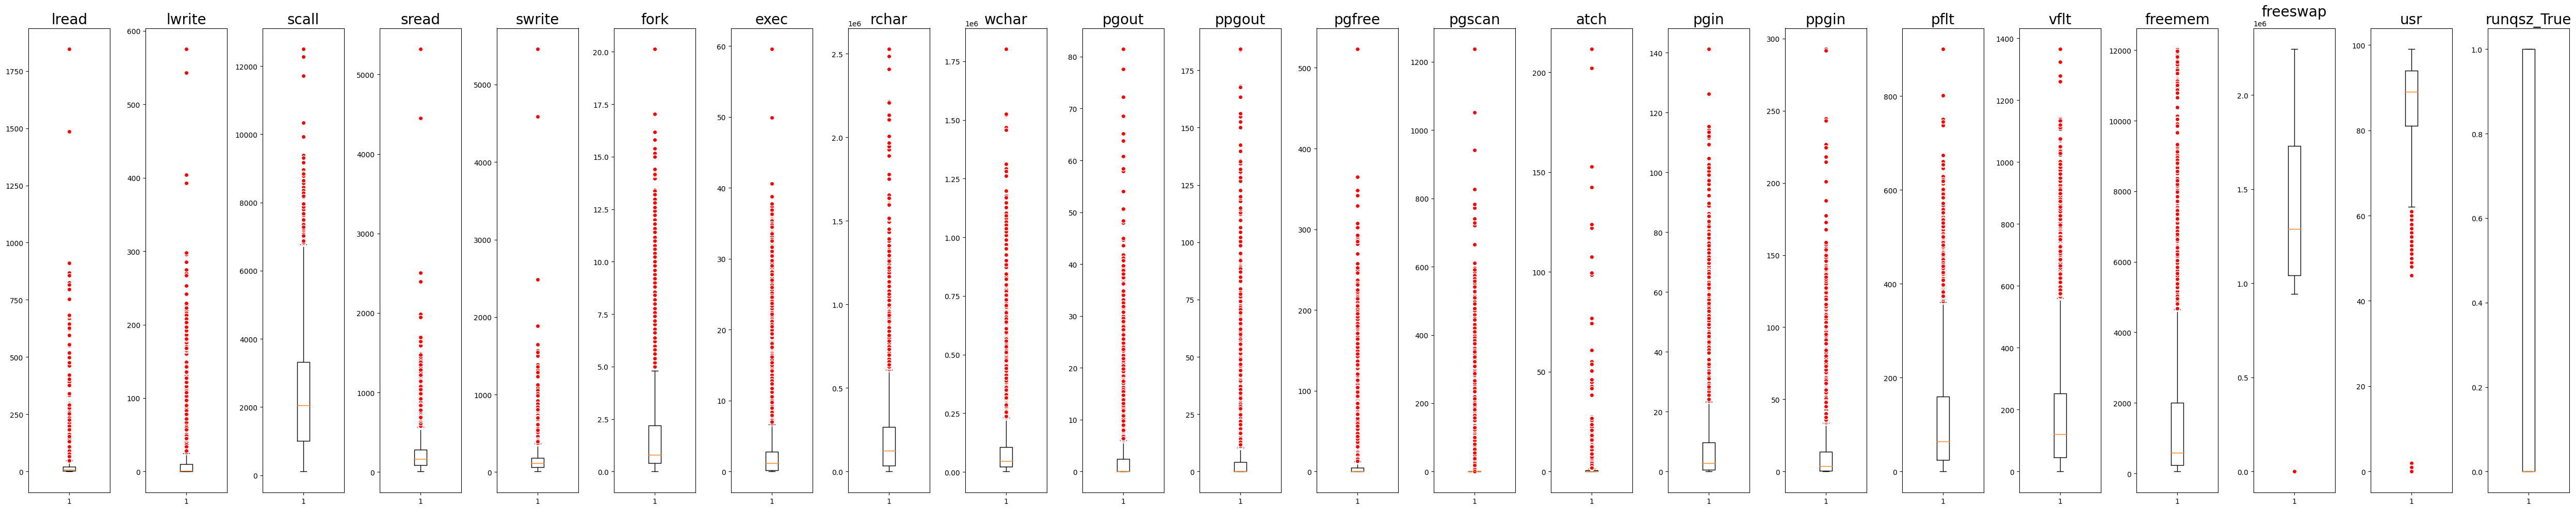

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(50,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=20, fontweight='normal')
    ax.tick_params(axis='y', labelsize=10)

    #Checking if column names are equal to columns we expect to be logarithmic
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()

plt.tight_layout()


In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [ ]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

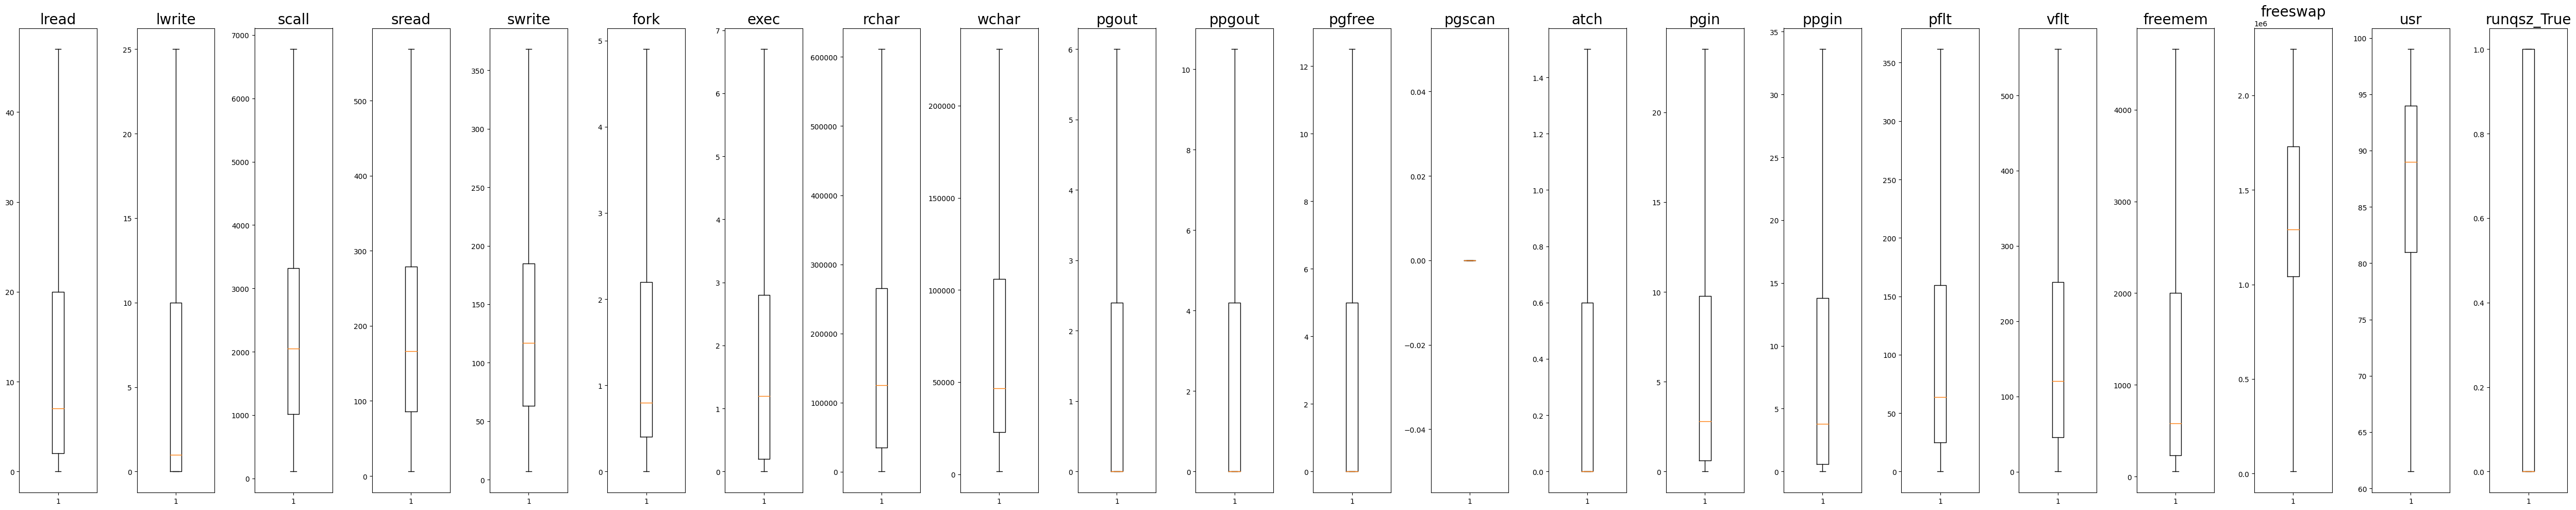

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(50,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=20, fontweight='normal')
    ax.tick_params(axis='y', labelsize=10)

    #Checking if column names are equal to columns we expect to be logarithmic
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()

plt.tight_layout()


**1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.**

In [ ]:
#Data is encoded in previous step
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lread        8192 non-null   float64
 1   lwrite       8192 non-null   float64
 2   scall        8192 non-null   float64
 3   sread        8192 non-null   float64
 4   swrite       8192 non-null   float64
 5   fork         8192 non-null   float64
 6   exec         8192 non-null   float64
 7   rchar        8192 non-null   float64
 8   wchar        8192 non-null   float64
 9   pgout        8192 non-null   float64
 10  ppgout       8192 non-null   float64
 11  pgfree       8192 non-null   float64
 12  pgscan       8192 non-null   float64
 13  atch         8192 non-null   float64
 14  pgin         8192 non-null   float64
 15  ppgin        8192 non-null   float64
 16  pflt         8192 non-null   float64
 17  vflt         8192 non-null   float64
 18  freemem      8192 non-null   float64
 19  freesw

In [ ]:
df.head().T

,0,1,2,3,4
lread,1.000,0.000,15.0,0.000,5.0
lwrite,0.000,0.000,3.0,0.000,1.0
scall,2147.000,170.000,2162.0,160.000,330.0
sread,79.000,18.000,159.0,12.000,39.0
swrite,68.000,21.000,119.0,16.000,38.0
fork,0.200,0.200,2.0,0.200,0.4
exec,0.200,0.200,2.4,0.200,0.4
rchar,40671.000,448.000,125473.5,125473.500,125473.5
wchar,53995.000,8385.000,31950.0,8670.000,12185.0
pgout,0.000,0.000,0.0,0.000,0.0


Train-Test Split


In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe.
y = df[['usr']]

In [ ]:
X.head()


,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_True
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,1
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,0.0,...,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,0
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,0.0,...,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,0


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


Linear Regression Model using **sklearn**


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for lread is -0.06348150618196245
The coefficient for lwrite is 0.04816128709127112
The coefficient for scall is -0.0006638280111675074
The coefficient for sread is 0.00030825210315167515
The coefficient for swrite is -0.005421822297643799
The coefficient for fork is 0.029312727249365546
The coefficient for exec is -0.32116648389885805
The coefficient for rchar is -5.1668417594745746e-06
The coefficient for wchar is -5.402875235427529e-06
The coefficient for pgout is -0.36881906387335767
The coefficient for ppgout is -0.07659768212738409
The coefficient for pgfree is 0.08448414470559423
The coefficient for pgscan is -4.440892098500626e-16
The coefficient for atch is 0.6275741574813001
The coefficient for pgin is 0.01998790767863925
The coefficient for ppgin is -0.06733383975701812
The coefficient for pflt is -0.033602829377515235
The coefficient for vflt is -0.005463668798519861
The coefficient for freemem is -0.00045846718794751725
The coefficient for freeswap is 8.831

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))


The intercept for our model is 85.73703864415215


In [ ]:
# R square on training data
regression_model.score(X_train, y_train)


0.796108610127457

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)


0.7677318597936156

In [ ]:
from sklearn import metrics


In [ ]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))


4.419536092979902

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))


4.652295704192616

Linear Regression using **statsmodels(OLS)**


In [ ]:
import statsmodels.api as sm


In [ ]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)


In [ ]:
model = sm.OLS(y_train,X_train).fit()
model

In [ ]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:53:17   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          85.7370      0.296    289.444      

In [ ]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)


In [ ]:
np.sqrt(mse) #RMSE on train


4.419536092979902

In [ ]:
# Prediction on Test data
y_pred = model.predict(X_test)


In [ ]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test


4.652295704190096

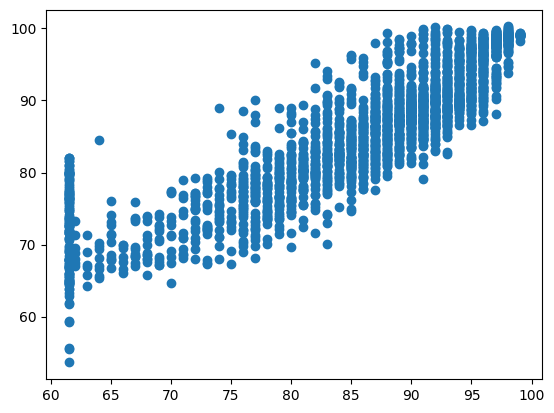

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()


In [ ]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')


(85.74) * const + (-0.06) * lread + (0.05) * lwrite + (-0.0) * scall + (0.0) * sread + (-0.01) * swrite + (0.03) * fork + (-0.32) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.37) * pgout + (-0.08) * ppgout + (0.08) * pgfree + (0.0) * pgscan + (0.63) * atch + (0.02) * pgin + (-0.07) * ppgin + (-0.03) * pflt + (-0.01) * vflt + (-0.0) * freemem + (0.0) * freeswap + (-1.62) * runqsz_True + 

**1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

The following are the observations for the above model:
1.	CPUs have two operating modes, kernel mode (system mode) and user mode, developed to prevent applications from constantly crashing computers. Kernel mode processes have full access to the hardware.
2.	When U_Bound increases by 1 unit, usr increases by 0.234 units, holding all other predictors constant. The usr value is influenced by both positive and negative coefficients. Positive coefficients lead to an increase in usr, while negative coefficients lead to a decrease.
3.	The most impactful variable on 'usr' is 'runqsz_Not_CPU_Bound'. Factors such as pflt (page faults due to protection errors) and scall (system calls per second) lead to a decrease in time spent in user mode, while an increase in 'freemem' (available memory pages) leads to an increase in time spent in user mode.
4.	Columns such as 'pflt_square', 'freeswap', 'wchar', 'rchar', and 'freeswap_square' have minimal impact on usr. As these values increase, the time spent in user mode decreases.
